In [ ]:
####################################################################################
# COUPE RESULTS:
# The best is Model 6: L2 regularization for Linear Regression with Polynomial Features degree 2, alpha 100, 8 features
# Training MSE: 5.4912
# Testing MSE: 5.2487
 
# THE RESULTS:
# The results of permutation feature importance indicate the relative importance of each feature in predicting 
# the price of a coupe. The most important feature for predicting the price has been condition with an importance 
# score of 0.238, and the model is fairly confident in this score, given that the standard deviation is only 0.008.
# Similarly, transmission_other has an importance score of 0.203, which is the second-highest among all features, 
# and a standard deviation of 0.009, indicating a high level of confidence in the importance score. On the other 
# hand, manufacturer_audi has the lowest importance score among all the features, with a value of only 0.003, 
# and a standard deviation of 0.001. This means that the model does not consider this feature to be very important
# in making its predictions.
####################################################################################

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

In [2]:
df_coupe_all= pd.read_csv('/Users/chameleonjj/Downloads/ASSIGNMENT 11/Data/df_coupe.csv')

In [3]:
df_coupe_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16562 entries, 0 to 16561
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        16562 non-null  object 
 1   price         16562 non-null  int64  
 2   manufacturer  16562 non-null  object 
 3   condition     12810 non-null  object 
 4   cylinders     14786 non-null  object 
 5   fuel          16531 non-null  object 
 6   odometer      16304 non-null  float64
 7   title_status  16334 non-null  object 
 8   transmission  16509 non-null  object 
 9   drive         13077 non-null  object 
 10  type          16562 non-null  object 
 11  paint_color   14132 non-null  object 
 12  state         16562 non-null  object 
 13  age           16562 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.8+ MB


In [4]:
df_coupe_all.head()

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
0,auburn,37990,chevrolet,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red,al,6.0
1,auburn,26590,honda,good,NaN,gas,9954.0,clean,other,fwd,coupe,silver,al,2.0
2,auburn,14590,bmw,good,NaN,other,80465.0,clean,other,NaN,coupe,black,al,10.0
3,auburn,8990,NA manufacturer,good,4 cylinders,gas,59072.0,clean,automatic,rwd,coupe,silver,al,9.0
4,birmingham,4500,ford,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,coupe,red,al,14.0


In [5]:
# We no longer need column 'type' (all values same)
df_coupe_all = df_coupe_all.drop('type', axis=1)

In [6]:
# Creating a data 'df_coupe' for columns describing the car condition.
df_coupe = df_coupe_all.drop(['region', 'state'], axis=1)

In [7]:
# Checking for missing values 
missing_values_count = df_coupe.isna().sum()
print(missing_values_count)

price              0
manufacturer       0
condition       3831
cylinders       1840
fuel              31
odometer         259
title_status     228
transmission      53
drive           3593
paint_color     2522
age                0
dtype: int64


In [8]:
### Since there is a large pool of data available in each column I decided to replace NaN values proportionately 
### Calculating percentage of each value in 'condition'
cond_pct = df_coupe['condition'].value_counts(normalize=True)
### Filling NaN values in 'condition' column with percentages
df_coupe.loc[:, 'condition'] = df_coupe['condition'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'cylinders'
cond_pct = df_coupe['cylinders'].value_counts(normalize=True)
### Filling NaN values in 'cylinders' column with percentages
df_coupe.loc[:, 'cylinders'] = df_coupe['cylinders'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'drive'
cond_pct = df_coupe['drive'].value_counts(normalize=True)
### Filling NaN values in 'drive' column with percentages
df_coupe.loc[:, 'drive'] = df_coupe['drive'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'paint_color'
cond_pct = df_coupe['paint_color'].value_counts(normalize=True)
### Filling NaN values in 'paint_color' column with percentages
df_coupe.loc[:, 'paint_color'] = df_coupe['paint_color'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'paint_color'
cond_pct = df_coupe['fuel'].value_counts(normalize=True)
### Filling NaN values in 'paint_color' column with percentages
df_coupe.loc[:, 'fuel'] = df_coupe['fuel'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'paint_color'
cond_pct = df_coupe['title_status'].value_counts(normalize=True)
### Filling NaN values in 'paint_color' column with percentages
df_coupe.loc[:, 'title_status'] = df_coupe['title_status'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'paint_color'
cond_pct = df_coupe['transmission'].value_counts(normalize=True)
### Filling NaN values in 'paint_color' column with percentages
df_coupe.loc[:, 'transmission'] = df_coupe['transmission'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)


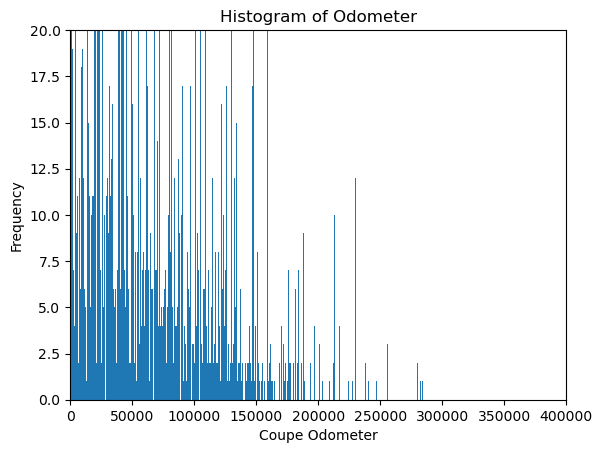

In [9]:
###COLUMN: 'ODOMETER'
### I am checking the distribution of the data for column 'odometer' to decide to how to fill NaN values
### ploting histogram
plt.hist(df_coupe['odometer'], bins=10000)
plt.xlabel('Coupe Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Odometer')
plt.ylim(top=20)
plt.xlim(left=0, right=400000)
plt.show()

In [10]:
###COLUMN: 'ODOMETER' CONTINUED
### since the distribution of the data is not symmetrical, I will use median to replace NaN values.
### Calculating the median value of the non-missing values
median_odometer = df_coupe['odometer'].median()

### Replacing the missing values with the median
df_coupe['odometer'] = df_coupe['odometer'].fillna(median_odometer)

In [11]:
# Checking for missing values 
missing_values_count = df_coupe.isna().sum()
print(missing_values_count)

price           0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
age             0
dtype: int64


In [12]:
# Applying the ordinal encoding to the 'condition' column
print(df_coupe['condition'].unique())

['good' 'excellent' 'like new' 'fair' 'new' 'salvage']


In [13]:
# Applying the ordinal encoding to the 'condition' column
encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'like new', 'new', 'excellent']])
df_coupe['condition_encoded'] = encoder.fit_transform(df_coupe[['condition']])

# Droping the original 'condition' column
df_coupe.drop('condition', axis=1, inplace=True)

In [14]:
# Applying the ordinal encoding to the 'title_status' column
print(df_coupe['title_status'].unique())

['clean' 'lien' 'rebuilt' 'missing' 'salvage' 'parts only']


In [15]:
# Checking for missing values 
missing_values_count = df_coupe.isna().sum()
print(missing_values_count)

price                0
manufacturer         0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
paint_color          0
age                  0
condition_encoded    0
dtype: int64


In [16]:
# Applying the ordinal encoding to the 'title_status' column
encoder = OrdinalEncoder(categories=[['parts only', 'salvage', 'rebuilt', 'missing', 'lien', 'clean']])
df_coupe['title_status'] = encoder.fit_transform(df_coupe[['title_status']])

# Droping the original 'condition' column
df_coupe.drop('title_status', axis=1, inplace=True)

In [17]:
#Applying OHE

# Selecting non-numeric columns
non_numeric_columns = df_coupe.select_dtypes(exclude='number').columns

# Applying one-hot encoding to non-numeric columns and concatenate with the original dataframe
df_encoded = pd.get_dummies(df_coupe, columns=non_numeric_columns, drop_first=False)

# Printing the new encoded DataFrame
df_encoded.head()


,price,odometer,age,condition_encoded,manufacturer_NA manufacturer,manufacturer_acura,manufacturer_aston-martin,manufacturer_audi,manufacturer_bentley,manufacturer_bmw,...,paint_color_gold,paint_color_gray,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,37990,9704.0,6.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,26590,9954.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14590,80465.0,10.0,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8990,59072.0,9.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4500,187016.0,14.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


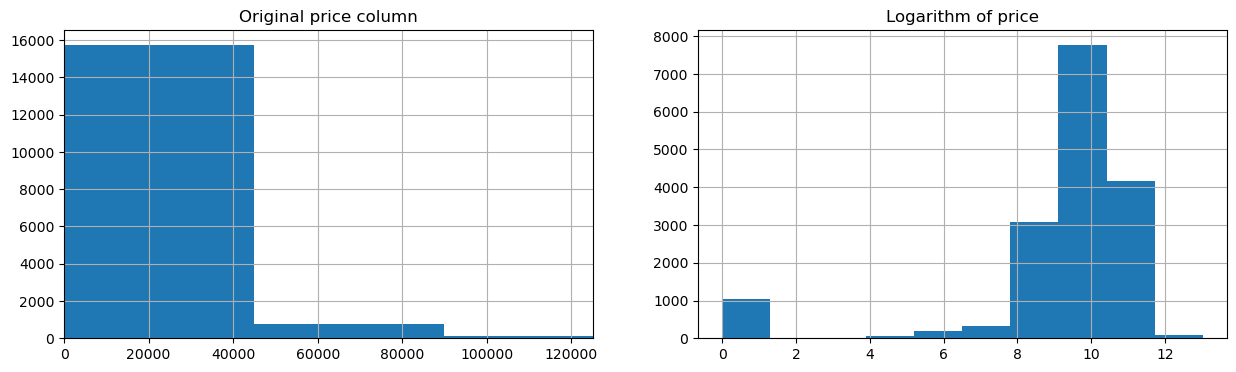

In [18]:
# Creating histograms of price column and the logarithm of the price column to visually compare the two distributions
# and to decide which one is more suitable for the machine learning model.
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(df_encoded['price'])
ax[0].set_xlim([0,125000])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(df_encoded['price']))
ax[1].grid()
ax[1].set_title('Logarithm of price');

In [19]:
# I will be using the logarithm of price for the ML model. Taking the logarithm of the price column can help to 
# make the distribution more symmetric. This can be useful in my ML model since it assumes normality of the price.

In [20]:
#Splitting the data frame with a Logarythmic target
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('price', axis = 1), np.log1p(df_encoded.price), 
                                                   random_state=42, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)

(11715, 77)
(5021, 77)


In [21]:
#Scaling the data with a StandardScaler to:
# * avoid bias towards features with larger values
# * improve numerical stability:
# * reduce the impact of outliers
# * enable efficient use of resources
scaler = StandardScaler()
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [22]:
# Before building a regression model, I set a baseline to compare my models to.
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(11715,) (5021,)
Baseline for training data: 6.447794430680741
Baseline for testing data: 6.165277568635561


In [23]:
# MODEL 1: No regularization: Linear Regression with Polynomial Features 
# My computer can only run up to degree 2
train_mses = []
test_mses = []
#for degree in 1 - 2
for i in range(1, 3):
    print(f'Running iteration {i}...')
    #creating pipeline with PolynomialFeatures degree i
    poly = make_column_transformer((PolynomialFeatures(degree=i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly), ('linreg', LinearRegression())])

    pipe.fit(X_train, y_train)
    #fitTing on train
    p1 = pipe.predict(X_train)
    p2 = pipe.predict(X_test)
    #predicting on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

best_degree = np.argmin(test_mses) + 1
print(f"Best degree: {best_degree}")
print(train_mses)
print(test_mses)
pipe

Running iteration 1...
Running iteration 2...
Best degree: 1
[5.6419536729456095, 4.409537163544817]
[5.4016623539080735, 31471.080483083835]


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc873993730>)])),
                ('linreg', LinearRegression())])

In [24]:
# # MODEL 1: No regularization: Linear Regression with Polynomial Features results
# The best is Linear Regression model with Polynomial Features degree 1 because it produces the lowest testing MSE:
# Training MSE: 5.6419536729456095
# Testing MSE: 5.4016623539080735
# This model compered to baseline model didn't perform well.

In [25]:
# MODEL 2: L1 Regularization (Lasso regression)for Linear Regression with Polynomial Features
# My computer can only run up to degree 2
# Defining polynomial degrees and a range of alpha values to test
degrees = [1, 2]
alphas = [0.1, 0.5, 1, 5, 10]

# Defining pipeline for polynomial feature generation, scaling, and Lasso regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5))
])

# Defining parameter grid for polynomial degree and alpha
param_grid = {
    'poly__degree': degrees,
    'lasso__cv': [5],
    'lasso__n_alphas': [100],
    'lasso__tol': [0.0001],
    'lasso__max_iter': [1000],
    'lasso__random_state': [42]
}

# Performing grid search to find best degree and alpha
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing best degree, alpha, and corresponding mean squared error
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_estimator_.named_steps['lasso'].alpha_
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Training MSE: {mse_train}')
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Testing MSE: {mse_test}')

Best degree: 2, Best alpha: 0.1, Training MSE: 5.56368251780698
Best degree: 2, Best alpha: 0.1, Testing MSE: 5.297577763825875


In [26]:
# MODEL 3: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features 
# My computer can only run up to degree 2
# Defining polynomial degrees and a range of alpha values to test
degrees = [1, 2]
alphas = [0.01, 0.1, 1, 10, 100]

# Defining pipeline for polynomial feature generation, scaling, and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Defining parameter grid for polynomial degree and alpha
param_grid = {
    'poly__degree': degrees,
    'ridge__alpha': alphas
}

# Performing grid search to find best degree and alpha
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing best degree, alpha, and corresponding mean squared error
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_params_['ridge__alpha']
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Training data MSE: {mse_train}, Testing data MSE: {mse_test}')


Best degree: 2, Best alpha: 100, Training data MSE: 4.416072012763742, Testing data MSE: 5.406446541225689


In [27]:
# Now I will run all models through SFS and RFE to hopefully get even better model

In [28]:
#SFS

In [29]:
# MODEL 4: Linear Regression with Polynomial Features degree 1
from sklearn.model_selection import GridSearchCV

# Defining the pipeline with polynomial features and Linear Regression
degree = 1

pipe = make_pipeline(
    SequentialFeatureSelector(LinearRegression(), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression())

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Linear Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              LinearRegression())
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 0  2  6 13 47 50 59 69]
Selected Feature Names: Index(['odometer', 'condition_encoded', 'manufacturer_audi',
       'manufacturer_dodge', 'cylinders_4 cylinders', 'cylinders_8 cylinders',
       'transmission_other', 'paint_color_green'],
      dtype='object')
Training MSE: 5.7432
Testing MSE: 5.4935


In [30]:
# MODEL 5: Lasso regression for Linear Regression with Polynomial Features degree 2 and alpha 0.1
from sklearn.linear_model import Lasso

# Defining the pipeline with polynomial features and Lasso Regression
degree = 2
alpha = 0.1

pipe = make_pipeline(
    SequentialFeatureSelector(Lasso(alpha=alpha), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Lasso(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(Lasso(alpha=alpha), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Lasso Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Lasso(alpha=alpha))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 0  2 47 59 60 61]
Selected Feature Names: Index(['odometer', 'condition_encoded', 'cylinders_4 cylinders',
       'transmission_other', 'drive_4wd', 'drive_fwd'],
      dtype='object')
Training MSE: 5.7177
Testing MSE: 5.4390


In [31]:
# MODEL 6: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features degree 2 and alpha 100
from sklearn.linear_model import Ridge

# Defining the pipeline with polynomial features and Ridge Regression
degree = 2
alpha = 100

pipe = make_pipeline(
    SequentialFeatureSelector(Ridge(alpha=alpha), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(Ridge(alpha=alpha), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Ridge Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Ridge(alpha=alpha))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

import copy

#Saving this incase it is the best model.
sfs_ridge_pipe = copy.deepcopy(pipe_selected)

sfs_x_selected = copy.deepcopy(X_test_selected)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 0  2  6 13 47 50 59 69]
Selected Feature Names: Index(['odometer', 'condition_encoded', 'manufacturer_audi',
       'manufacturer_dodge', 'cylinders_4 cylinders', 'cylinders_8 cylinders',
       'transmission_other', 'paint_color_green'],
      dtype='object')
Training MSE: 5.4912
Testing MSE: 5.2487


In [32]:
#RFE

In [33]:
#MODEL 7: No regularization: Linear Regression with Polynomial Features degree 1 run through RFE.
# Define the pipeline with polynomial features, RFE selector, and Linear Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Defining the pipeline with polynomial features, RFE selector, and Linear Regression
degree = 1
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(LinearRegression()))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Fitting and transform the training data to include polynomial features
poly.fit(X_train)
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)

# Transforming the test data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(LinearRegression(), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.fit(X_train_poly, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

# Fitting the pipeline with polynomial features and Linear Regression on the selected features 
pipe_selected = make_pipeline(StandardScaler(),
                              LinearRegression())
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Selected Feature Indices: [57 58 59 60 61 62]
Selected Feature Names: Index(['transmission_automatic', 'transmission_manual', 'transmission_other',
       'drive_4wd', 'drive_fwd', 'drive_rwd'],
      dtype='object')
Training MSE: 5.8779
Testing MSE: 5.6467


In [ ]:
# THIS MODEL TOOK TO LONG TO RUN ON MY COMPUTER... HENCE I WILL EXLUDE IT FROM MY CONSIDERATION
# MODEL 8: Lasso regression for Linear Regression with Polynomial Features degree 3 and alpha 0.1
degree = 2
alpha = 0.1

# Defining the pipeline with RFE and Lasso regression
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(Lasso(alpha=alpha)),
                     Lasso(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(Lasso(alpha=alpha), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.steps[3] = ('lasso', Lasso(alpha=alpha))
pipe.fit(X_train, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Using the PolynomialFeatures object to transform the data to include polynomial features
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)


# Using the PolynomialFeatures object to transform the data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

#Fiting the pipeline with polynomial features and Lasso Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Lasso (alpha=100))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Print the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


In [ ]:
# MODEL 9: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features degree 2 and alpha 100
# THIS MODEL TOOK TO LONG TO RUN ON MY COMPUTER... HENCE I WILL EXLUDE IT FROM MY CONSIDERATION
degree = 1
alpha = 100

# Defining the pipeline with RFE and Ridge regression
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(Ridge(alpha=alpha)),
                     Ridge(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(Ridge(alpha=alpha), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.steps[3] = ('ridge', Ridge(alpha=alpha))
pipe.fit(X_train, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Using the PolynomialFeatures object to transform the data to include polynomial features
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)


# Using the PolynomialFeatures object to transform the data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

# Fitting the pipeline with polynomial features and Ridge Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Ridge(alpha=100))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


In [ ]:
####################################################################################
####################################################################################

# The best is Model 6: L2 regularization for Linear Regression with Polynomial Features degree 2, alpha 100, 8 features
# Training MSE: 5.4912
# Testing MSE: 5.2487

# Now we will run permutation feature selection for Model 6 to select the best features.

####################################################################################
####################################################################################

In [48]:
scoring = ['r2']
r_multi = permutation_importance(sfs_ridge_pipe, sfs_x_selected, y_test, n_repeats=30, random_state=0, scoring=scoring)

print("R2 Scores:")
r2_scores = r_multi['r2']
selected_columns = list(sfs_x_selected.columns)
if len(selected_columns) != len(r2_scores.importances_mean):
    print("Error: number of selected columns does not match number of R2 scores.")
else:
    for i in r2_scores.importances_mean.argsort()[::-1]:
        if r2_scores.importances_mean[i] - r2_scores.importances_std[i] > 0:
            print(f"    {selected_columns[i]:<8}"
                  f" {r2_scores.importances_mean[i]:.3f}"
                  f" +/- {r2_scores.importances_std[i]:.3f}")


R2 Scores:
    condition_encoded 0.238 +/- 0.008
    transmission_other 0.203 +/- 0.009
    manufacturer_dodge 0.025 +/- 0.002
    odometer 0.023 +/- 0.003
    paint_color_green 0.019 +/- 0.003
    cylinders_4 cylinders 0.017 +/- 0.003
    cylinders_8 cylinders 0.015 +/- 0.003
    manufacturer_audi 0.003 +/- 0.001


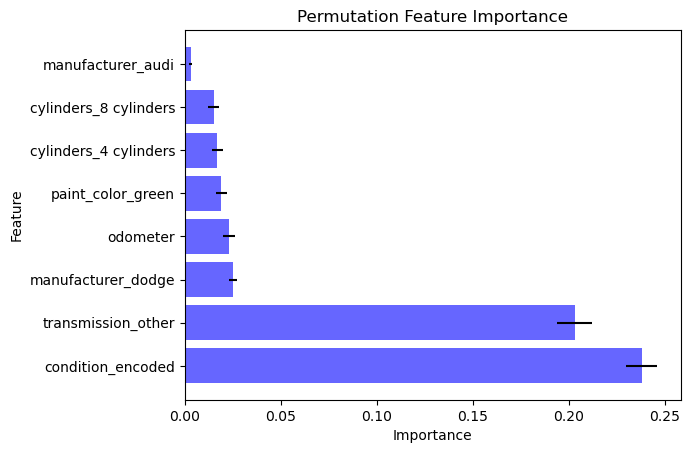

In [49]:
# Creating a plot of feature importance to make it easier to read the results
# creating a list of feature names
features = ['condition_encoded', 'transmission_other', 'manufacturer_dodge', 'odometer', 'paint_color_green', 'cylinders_4 cylinders', 'cylinders_8 cylinders', 'manufacturer_audi']

# creating a list of feature importance values
importance = [0.238, 0.203, 0.025, 0.023, 0.019, 0.017, 0.015, 0.003]

# creating a list of standard deviation values
std_dev = [0.008, 0.009, 0.002, 0.003, 0.003, 0.003, 0.003, 0.001]

# creating a new figure
fig, ax = plt.subplots()

# setting the title and axes labels
ax.set_title('Permutation Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# creating a horizontal bar chart
ax.barh(features, importance, xerr=std_dev, color='blue', alpha=0.6)

# showing the plot
plt.show()

In [ ]:
####################################################################################
# THE RESULTS:
# The results of permutation feature importance indicate the relative importance of each feature in predicting 
# the price of a coupe. The most important feature for predicting the price has been condition with an importance 
# score of 0.238, and the model is fairly confident in this score, given that the standard deviation is only 0.008.
# Similarly, transmission_other has an importance score of 0.203, which is the second-highest among all features, 
# and a standard deviation of 0.009, indicating a high level of confidence in the importance score. On the other 
# hand, manufacturer_audi has the lowest importance score among all the features, with a value of only 0.003, 
# and a standard deviation of 0.001. This means that the model does not consider this feature to be very important
# in making its predictions.
####################################################################################

In [50]:
# Saving the results into .csv file to upload them into customer's presentation
# creating a dictionary of the feature importance data
feature_importance = {
    'feature': ['condition_encoded', 'transmission_other', 'manufacturer_dodge', 'odometer', 'paint_color_green', 'cylinders_4 cylinders', 'cylinders_8 cylinders', 'manufacturer_audi'],
    'importance': [0.238, 0.203, 0.025, 0.023, 0.019, 0.017, 0.015, 0.003],
    'std_dev': [0.008, 0.009, 0.002, 0.003, 0.003, 0.003, 0.003, 0.001]
}

# creating a pandas DataFrame from the feature importance dictionary
coupe_features_importance = pd.DataFrame(feature_importance)

# saving the DataFrame to a CSV file
coupe_features_importance.to_csv('coupe_features_importance.csv', index=False)


In [35]:
# STATISTICS FOR THE PREVIOUS YEAR (not part of the assignment)
# To paint a complete picture for the dealership I believe that part of the report should be information about sales
# in previous years. The section below creates charts and csv files for me to be able to create a final report

In [36]:
df_coupe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              16736 non-null  int64  
 1   manufacturer       16736 non-null  object 
 2   cylinders          16736 non-null  object 
 3   fuel               16736 non-null  object 
 4   odometer           16736 non-null  float64
 5   transmission       16736 non-null  object 
 6   drive              16736 non-null  object 
 7   paint_color        16736 non-null  object 
 8   age                16736 non-null  float64
 9   condition_encoded  16736 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


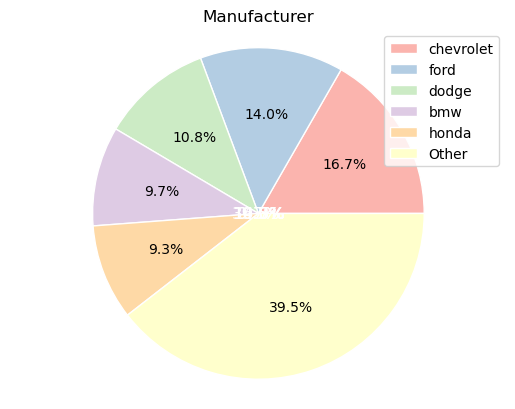

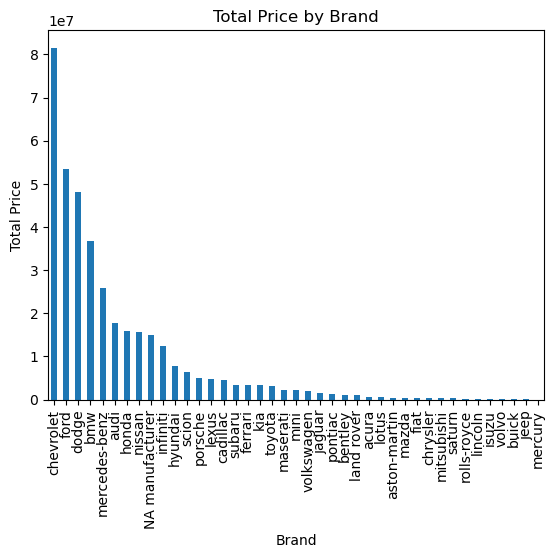

In [37]:
# Count the number of occurrences of each value in the 'manufacturer' column
colors_count = df_coupe['manufacturer'].value_counts()

# Get the count of top 5 manufacturers
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 manufacturers
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all manufacturers excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of manufacturers including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of manufacturer labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'manufacturer' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the manufacturer of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the manufacturer of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all manufacturers
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('Manufacturer')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_manufacturer_results_number.csv', index=False)

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'manufacturer' and calculate the sum of 'price'
color_prices = df_coupe.groupby('manufacturer')['price'].sum()

# Sort the 'manufacturers' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'manufacturer'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Brand')
plt.ylabel('Total Price')
plt.title('Total Price by Brand')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'manufacturer': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_manufacturer_results_dollar.csv', index=False)

plt.show()


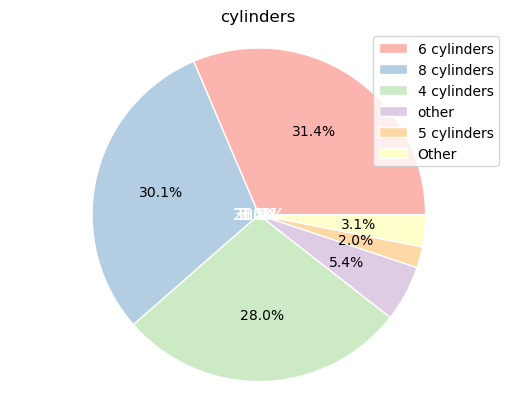

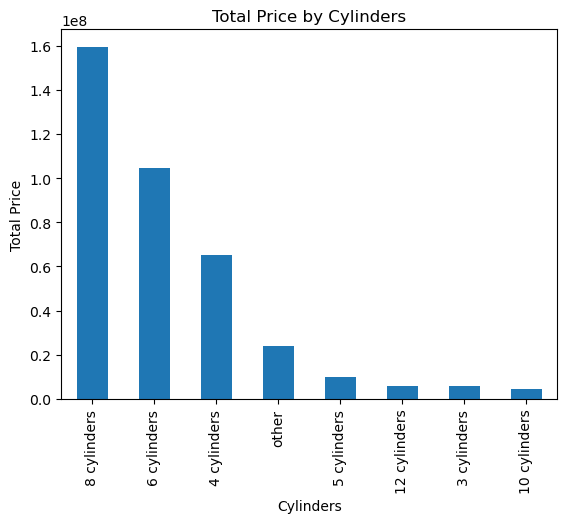

In [38]:
# Count the number of occurrences of each value in the 'cylinders' column
colors_count = df_coupe['cylinders'].value_counts()

# Get the count of top 5 cylinderss
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 cylinderss
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all cylinderss excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of cylinderss including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of cylinders labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'cylinders' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the cylinders of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the cylinders of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all cylinderss
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('cylinders')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_cylinders_results_number.csv', index=False)

plt.show()

# Group the data by 'cylinders' and calculate the sum of 'price'
color_prices = df_coupe.groupby('cylinders')['price'].sum()

# Sort the 'cylinderss' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'cylinders'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Cylinders')
plt.ylabel('Total Price')
plt.title('Total Price by Cylinders')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'cylinders': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_cylinders_results_dollar.csv', index=False)

plt.show()


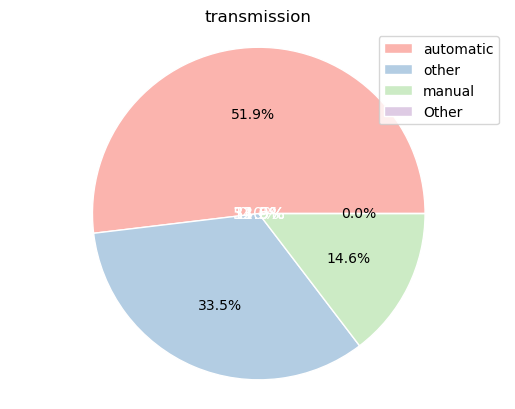

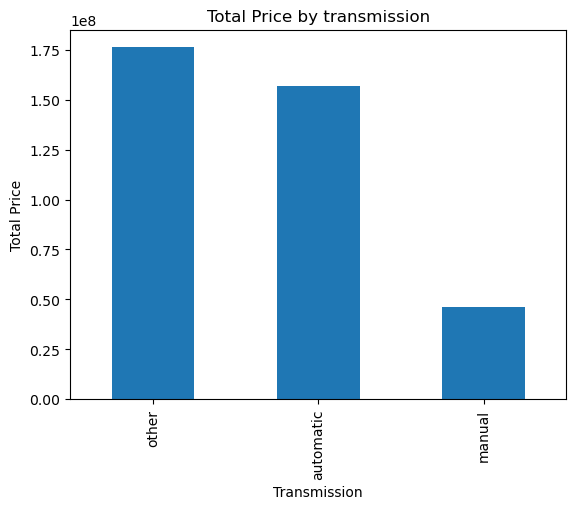

In [39]:
# Count the number of occurrences of each value in the 'transmission' column
colors_count = df_coupe['transmission'].value_counts()

# Get the count of top 5 transmissions
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 transmissions
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all transmissions excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of transmissions including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of transmission labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'transmission' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the transmission of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the transmission of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all transmissions
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('transmission')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_transmission_results_number.csv', index=False)

plt.show()

# Group the data by 'transmission' and calculate the sum of 'price'
color_prices = df_coupe.groupby('transmission')['price'].sum()

# Sort the 'transmissions' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'transmission'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Transmission')
plt.ylabel('Total Price')
plt.title('Total Price by transmission')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'transmission': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_transmission_results_dollar.csv', index=False)

plt.show()


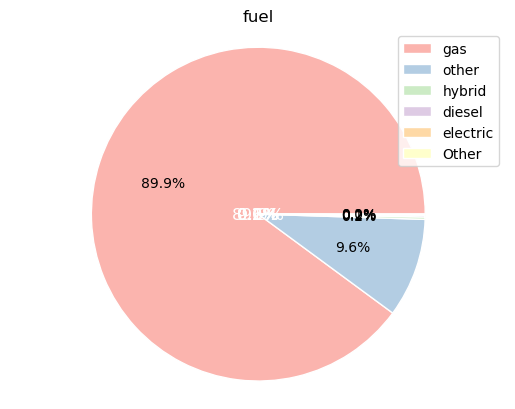

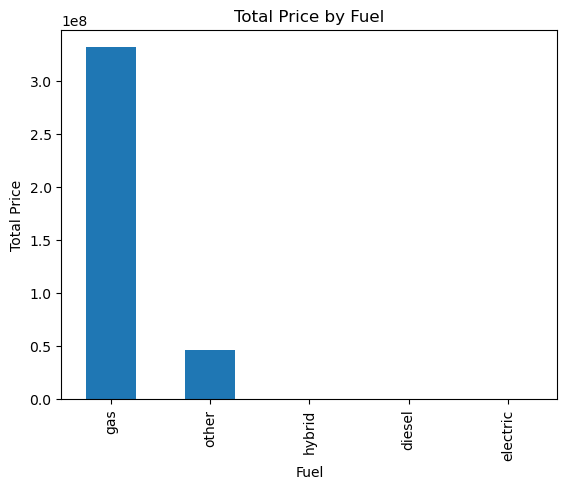

In [40]:
# Count the number of occurrences of each value in the 'fuel' column
colors_count = df_coupe['fuel'].value_counts()

# Get the count of top 5 fuels
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 fuels
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all fuels excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of fuels including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of fuel labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'fuel' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the fuel of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the fuel of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all fuels
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('fuel')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_fuel_results_number.csv', index=False)

plt.show()

# Group the data by 'fuel' and calculate the sum of 'price'
color_prices = df_coupe.groupby('fuel')['price'].sum()

# Sort the 'fuels' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'fuel'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Fuel')
plt.ylabel('Total Price')
plt.title('Total Price by Fuel')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'fuel': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_fuel_results_dollar.csv', index=False)

plt.show()


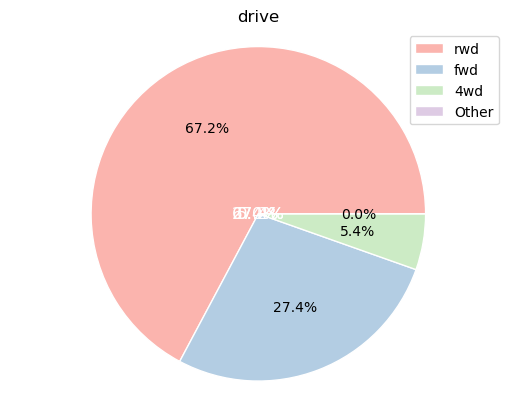

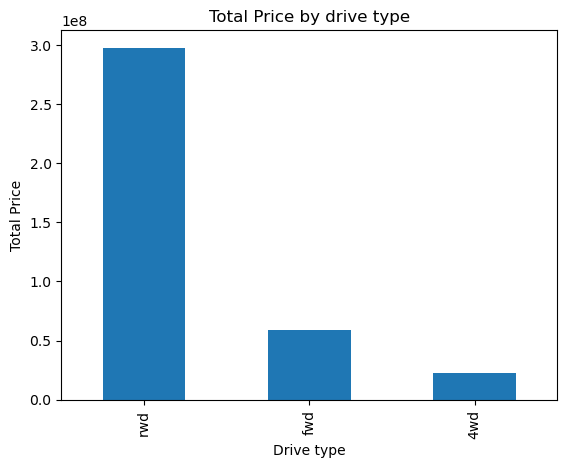

In [41]:
# Count the number of occurrences of each value in the 'drive' column
colors_count = df_coupe['drive'].value_counts()

# Get the count of top 5 drives
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 drives
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all drives excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of drives including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of drive labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'drive' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the drive of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the drive of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all drives
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('drive')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_drive_results_number.csv', index=False)

plt.show()

# Group the data by 'drive' and calculate the sum of 'price'
color_prices = df_coupe.groupby('drive')['price'].sum()

# Sort the 'drives' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'drive'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Drive type')
plt.ylabel('Total Price')
plt.title('Total Price by drive type')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'drive': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_drive_results_dollar.csv', index=False)

plt.show()


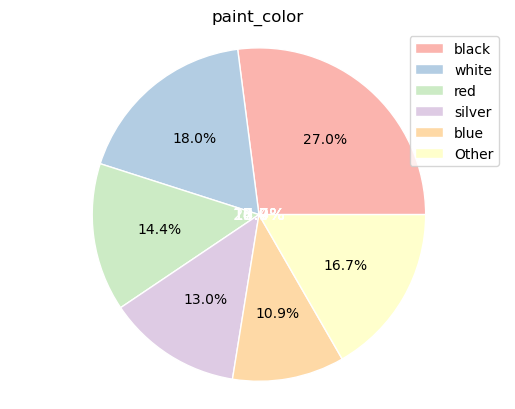

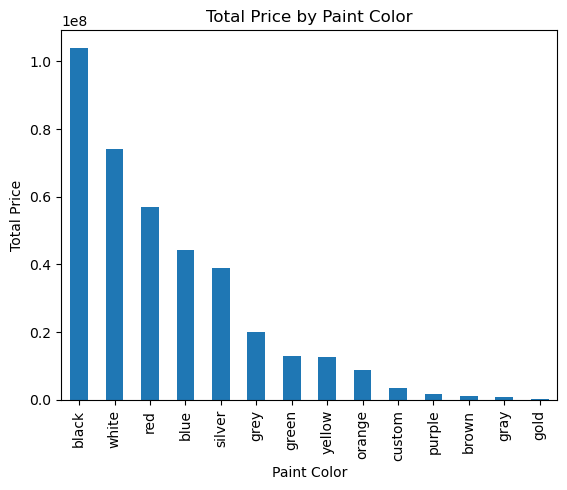

In [42]:
# Count the number of occurrences of each value in the 'paint_color' column
colors_count = df_coupe['paint_color'].value_counts()

# Get the count of top 5 paint_colors
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 paint_colors
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all paint_colors excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of paint_colors including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of paint_color labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'paint_color' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the paint_color of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the paint_color of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all paint_colors
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('paint_color')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_paint_color_results_number.csv', index=False)

plt.show()

# Group the data by 'paint_color' and calculate the sum of 'price'
color_prices = df_coupe.groupby('paint_color')['price'].sum()

# Sort the 'paint_colors' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'paint_color'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Paint Color')
plt.ylabel('Total Price')
plt.title('Total Price by Paint Color')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'paint_color': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_paint_color_results_dollar.csv', index=False)

plt.show()


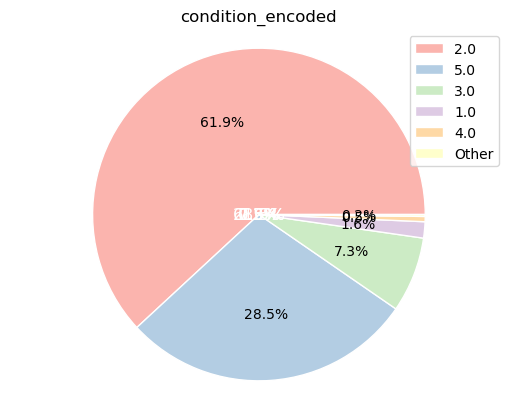

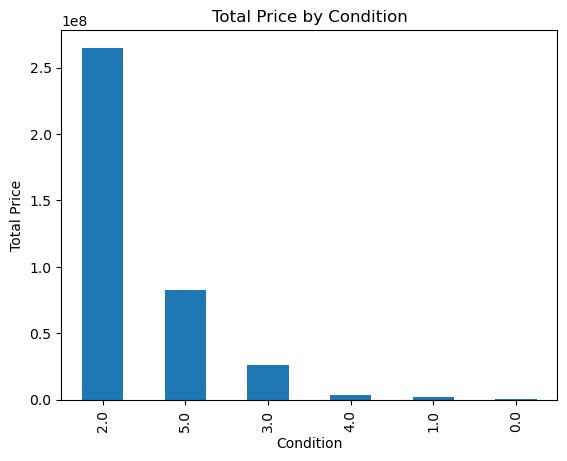

In [43]:
# Count the number of occurrences of each value in the 'condition_encoded' column
colors_count = df_coupe['condition_encoded'].value_counts()

# Get the count of top 5 condition_encodeds
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 condition_encodeds
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all condition_encodeds excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of condition_encodeds including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of condition_encoded labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'condition_encoded' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the condition_encoded of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the condition_encoded of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all condition_encodeds
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('condition_encoded')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_condition_encoded_results_number.csv', index=False)

plt.show()

# Group the data by 'condition_encoded' and calculate the sum of 'price'
color_prices = df_coupe.groupby('condition_encoded')['price'].sum()

# Sort the 'condition_encodeds' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'condition_encoded'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Condition')
plt.ylabel('Total Price')
plt.title('Total Price by Condition')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'condition_encoded': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('coupe_condition_encoded_results_dollar.csv', index=False)

plt.show()
